# Decision Tree(Assignment)

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Import the dataset

In [29]:
df = pd.read_excel('heart_disease.xlsx', sheet_name = 'Heart_disease') # Read excel file
df.to_csv('heart_disease.csv', index = False) # Convert excel sheet into csv file

In [30]:
df = pd.read_csv('heart_disease.csv') # Read csv file

In [31]:
df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0


In [32]:
df.dtypes

age           int64
sex          object
cp           object
trestbps      int64
chol          int64
fbs            bool
restecg      object
thalch        int64
exang        object
oldpeak     float64
slope        object
thal         object
num           int64
dtype: object

In [33]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch',
       'exang', 'oldpeak', 'slope', 'thal', 'num'],
      dtype='object')

In [34]:
df.shape

(908, 13)

In [35]:
df.describe()

,age,trestbps,chol,thalch,oldpeak,num
count,908.000000,908.000000,908.000000,908.000000,846.000000,908.000000
mean,53.791850,133.430617,201.484581,135.957048,0.891253,1.008811
std,9.158031,20.401608,112.097949,26.804929,1.093875,1.144436
min,29.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.750000,120.000000,176.750000,118.000000,0.000000,0.000000
50%,54.000000,130.000000,224.000000,138.000000,0.500000,1.000000
75%,60.000000,144.000000,270.000000,156.000000,1.500000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,4.000000


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


## Check for duplicate values

In [37]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
903    False
904    False
905    False
906    False
907    False
Length: 908, dtype: bool

In [38]:
df.loc[df.duplicated()] # Returns duplicated cell

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
765,58,Male,non-anginal,150,219,False,st-t abnormality,118,True,0.0,downsloping,normal,2


In [39]:
df = df.drop_duplicates()

In [40]:
df.shape

(907, 13)

## Check for NULL values

In [41]:
df.isna().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64

In [42]:
df.fillna(df['oldpeak'].median(), inplace = True)

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 907 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       907 non-null    int64  
 1   sex       907 non-null    object 
 2   cp        907 non-null    object 
 3   trestbps  907 non-null    int64  
 4   chol      907 non-null    int64  
 5   fbs       907 non-null    bool   
 6   restecg   907 non-null    object 
 7   thalch    907 non-null    int64  
 8   exang     907 non-null    object 
 9   oldpeak   907 non-null    float64
 10  slope     907 non-null    object 
 11  thal      907 non-null    object 
 12  num       907 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 93.0+ KB


## Visualizing the features

In [61]:
# Converting categorical columns to string for better plots

cat_cols = ['sex', 'cp', 'slope', 'thal', 'exang', 'num']
for col in cat_cols:
    df[col] = df[col].astype(str)

C:\Users\vighn\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\vighn\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\vighn\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\vighn\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

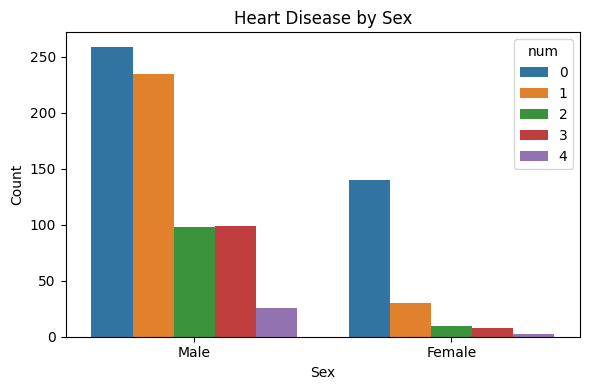

In [77]:
# Plot 1: Heart Disease by Sex.

plt.figure(figsize=(6, 4))
sns.countplot(x='sex', hue='num', data = df)
plt.title('Heart Disease by Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

C:\Users\vighn\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\vighn\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\vighn\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\vighn\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

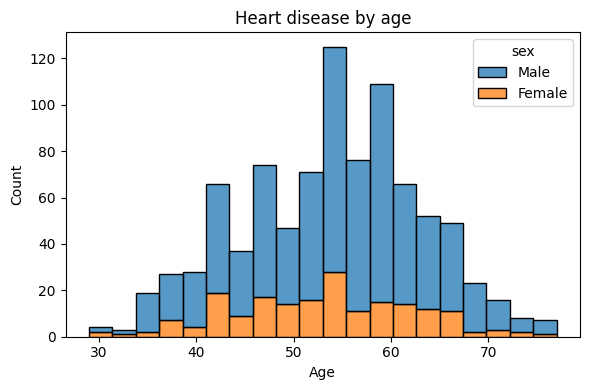

In [76]:
# Plot 2 : Heart disease by Age.

plt.figure(figsize = (6, 4))
sns.histplot(x = 'age', hue = 'sex', multiple = 'stack', data = df, bins = 20)
plt.title('Heart disease by age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

C:\Users\vighn\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\vighn\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\vighn\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\vighn\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

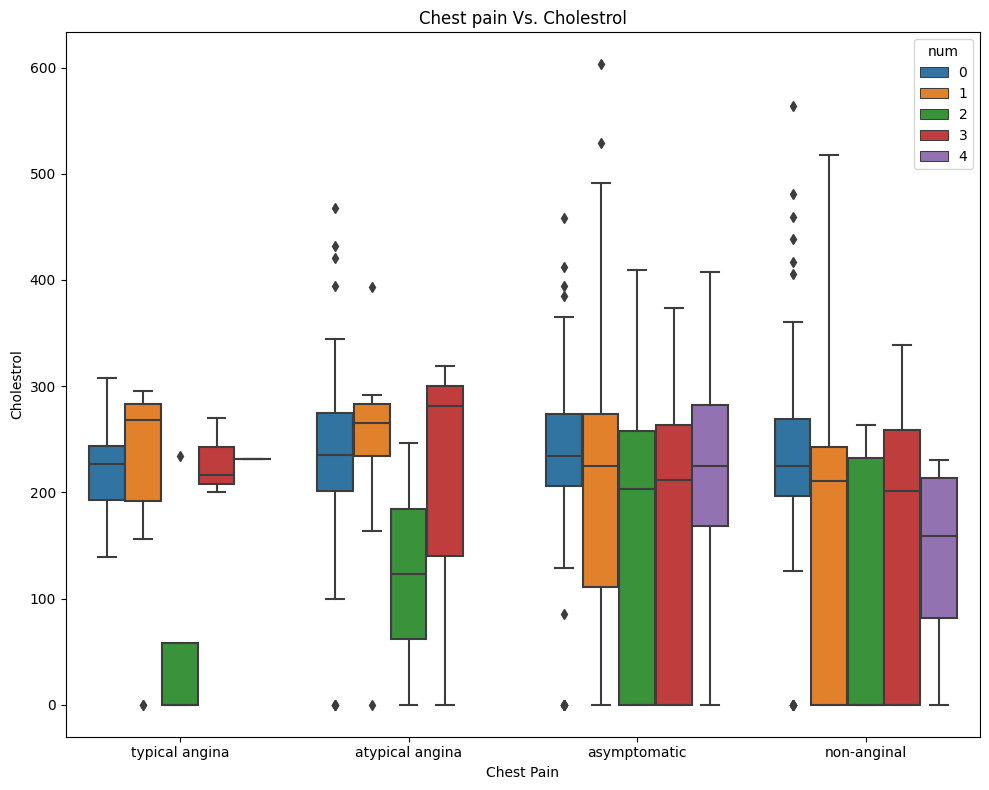

In [75]:
# Plot 3: Chest Pain by Cholestrol

plt.figure(figsize = (10,8))
sns.boxplot(x = 'cp', y = 'chol', data = df, hue = 'num')
plt.title('Chest pain Vs. Cholestrol')
plt.xlabel('Chest Pain')
plt.ylabel('Cholestrol')
plt.tight_layout()
plt.show()

## Encode the dataset

In [79]:
cat_cols = df.select_dtypes(include = 'object').columns
cat_cols

Index(['sex', 'cp', 'restecg', 'exang', 'slope', 'thal', 'num'], dtype='object')

In [80]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

In [81]:
df.dtypes

age           int64
sex           int32
cp            int32
trestbps      int64
chol          int64
fbs            bool
restecg       int32
thalch        int64
exang         int32
oldpeak     float64
slope         int32
thal          int32
num           int32
dtype: object

## Splitting the dataset

In [84]:
from sklearn.model_selection import train_test_split

X = df.drop(['num'], axis = 1)
y = df['num']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

## Build the model

In [85]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [86]:
y_pred = clf.predict(X_test)

## Evaluate the model

In [88]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print('Accuracy Score= \n', accuracy_score(y_test, y_pred))
print('\nConfusion Matrix= \n', confusion_matrix(y_test, y_pred))
print('\nClassification Report: \n', classification_report(y_test, y_pred))

Accuracy Score= 
 0.532967032967033

Confusion Matrix= 
 [[63 18  2  5  1]
 [14 23  4  4  2]
 [ 3  7  6  4  0]
 [ 4  5  2  5  1]
 [ 1  4  3  1  0]]

Classification Report: 
               precision    recall  f1-score   support

           0       0.74      0.71      0.72        89
           1       0.40      0.49      0.44        47
           2       0.35      0.30      0.32        20
           3       0.26      0.29      0.28        17
           4       0.00      0.00      0.00         9

    accuracy                           0.53       182
   macro avg       0.35      0.36      0.35       182
weighted avg       0.53      0.53      0.53       182



## Visualize the tree

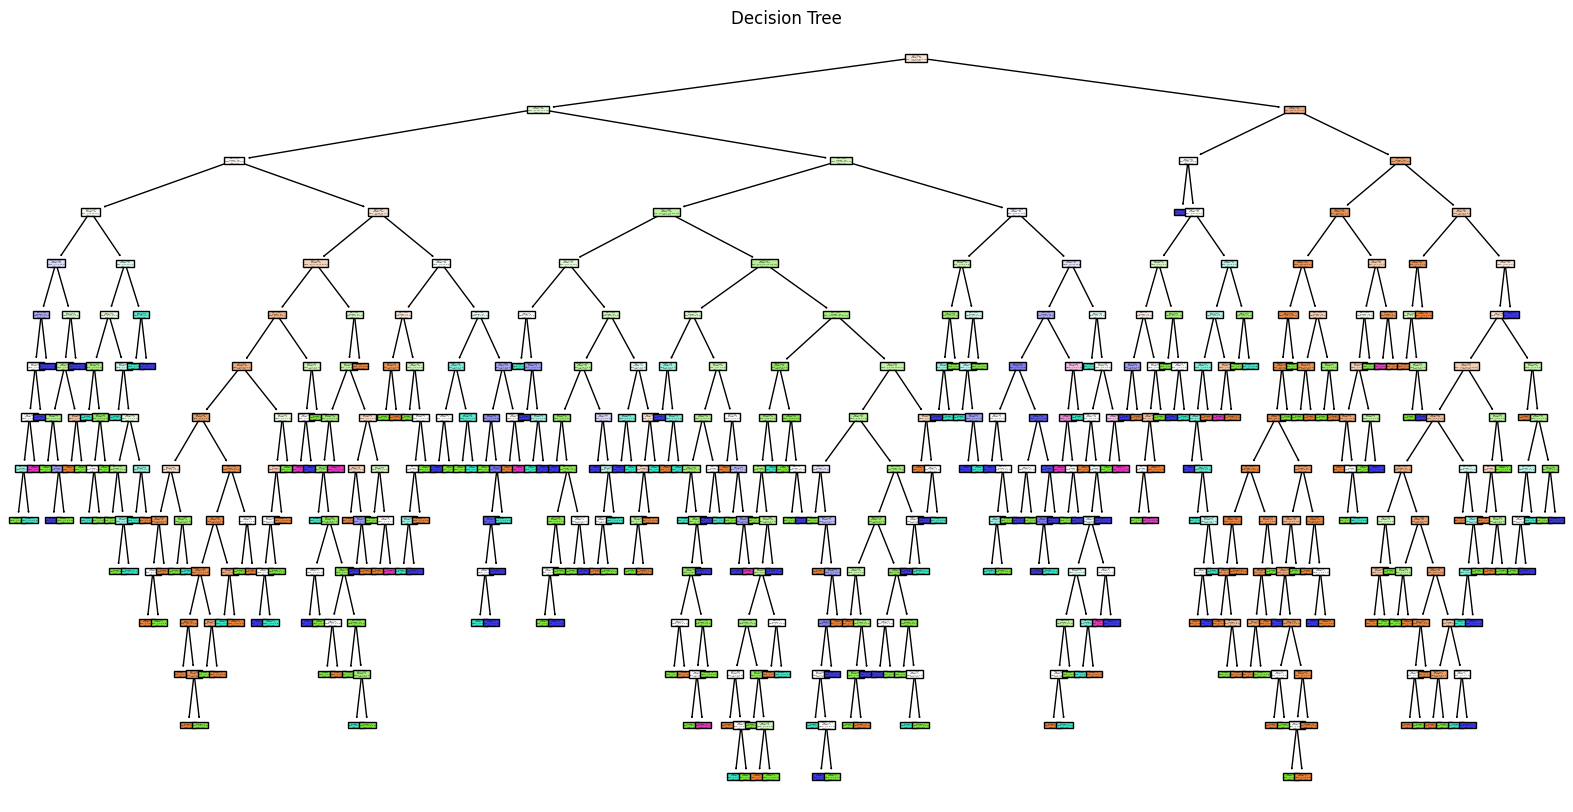

In [96]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=True)
plt.title("Decision Tree")
plt.show()

## Hyperparameter Tuning

In [92]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid to search
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

# Initialize model
dtree = DecisionTreeClassifier(random_state=42)

# Grid search with 5-fold cross-validation
grid_search = GridSearchCV(estimator=dtree, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best hyperparameters and performance
print("Best Parameters:", grid_search.best_params_)
print("Best CV Accuracy:", grid_search.best_score_)


Best Parameters: {'criterion': 'gini', 'max_depth': 3, 'min_samples_split': 2}
Best CV Accuracy: 0.5462068965517242


In [98]:
# Predict with the best model

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Model Evaluation

print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Test Accuracy: 0.5769230769230769

Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.87      0.79        89
           1       0.42      0.57      0.49        47
           2       0.00      0.00      0.00        20
           3       0.09      0.06      0.07        17
           4       0.00      0.00      0.00         9

    accuracy                           0.58       182
   macro avg       0.25      0.30      0.27       182
weighted avg       0.47      0.58      0.52       182

Confusion Matrix:
 [[77 11  0  1  0]
 [15 27  0  5  0]
 [ 4 13  0  3  0]
 [ 6 10  0  1  0]
 [ 5  3  0  1  0]]


C:\Users\vighn\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\vighn\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\vighn\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

## Visualize the 'Tuned' tree

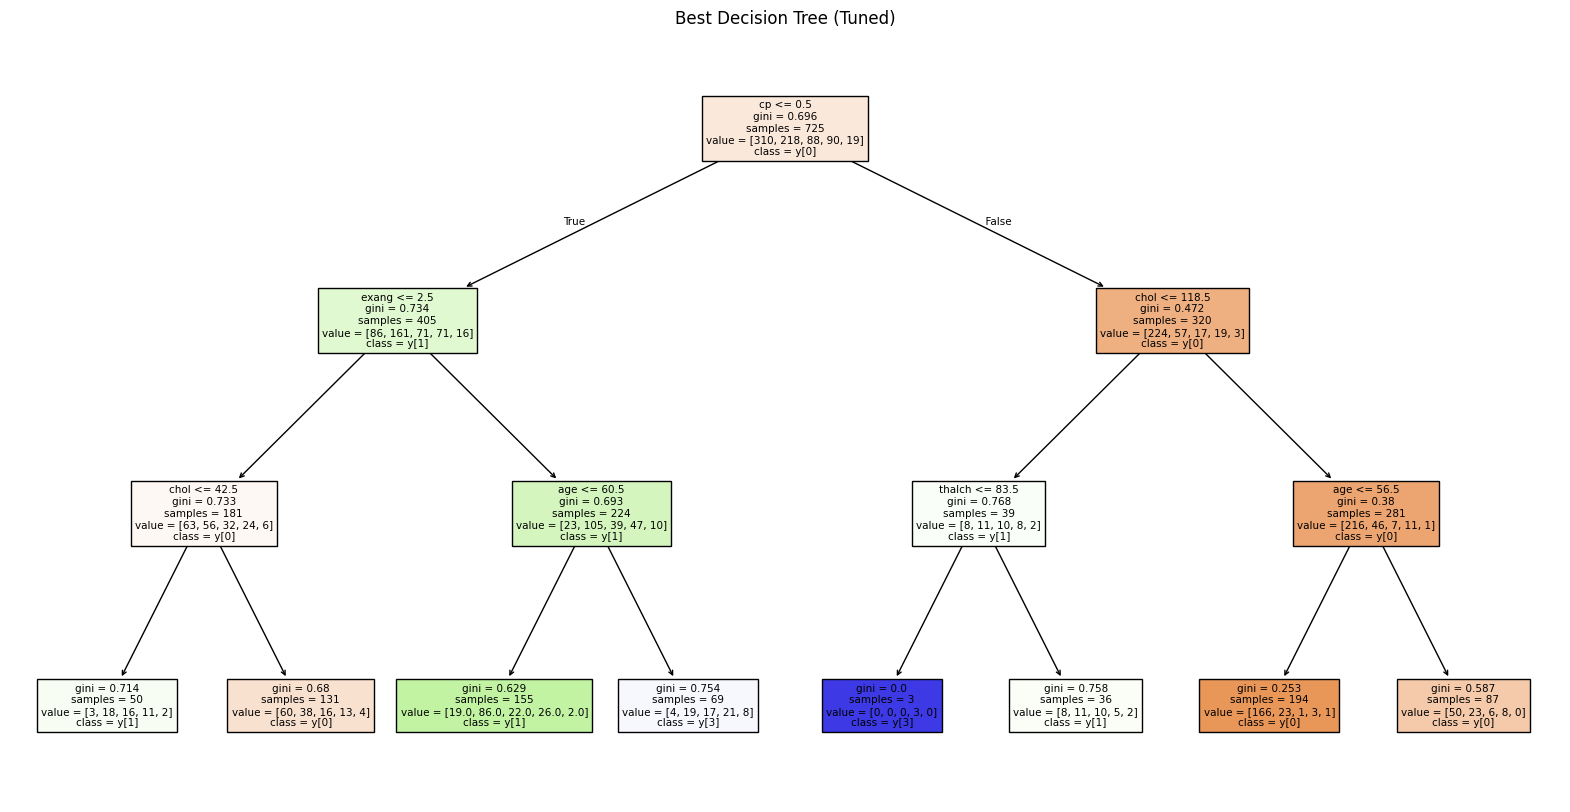

In [99]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(best_model, filled=True, feature_names=X.columns, class_names=True)
plt.title("Best Decision Tree (Tuned)")
plt.show()

# Interview Questions

### Q. What are some common hyperparameters of decision tree models, and how do they affect the model's performance?

max_depth : Limits how deep the tree can go. Prevents overfitting if too deep.

min_samples_split : Minimum samples needed to split a node. Higher → simpler tree.

min_samples_leaf : Minimum samples needed at a leaf node. Higher → smoother predictions.

max_features : Limits number of features considered at each split. Reduces variance.

max_leaf_nodes : Limits number of features considered at each split. Reduces variance.

criterion : Split quality metric: 'gini' (default) or 'entropy'. May affect splits.

### Q. What is the difference between Label encoding and One-hot encoding?

One-Hot Encoding is used when categories have no order (Nominal data)

Label Encoding is used when categories have a meaningful order (Ordinal data)